In [22]:
% some housekeeping stuff
%register_graphics_toolkit ("notebook");
register_graphics_toolkit ("plotly");
clear
format short e
% end of housekeeping

# More Buffering and CO2  
Buffer weak acid + conjugate base OR weak base + conjugate acid  
For example: $\mathrm{HAC + NaAc}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{NH_3 + NH_4Cl}$  

pKb NH<sub>3</sub> is 4.75. What is the approximate pH of NH<sub>3</sub>/NH<sub>4</sub>Cl buffer?  
$\approx 9.25$  
pH of 0.01 M NaAC with 0.01 M HAc (pKa HAc = 4.75)  
list species  
$\mathrm{H^+, Na^+, HAc, Ac^-, OH^-}$  
$\mathrm{[H^+] + [Na^+] = [Ac^] + [OH^-]}$  
Expected pH: Acidic (4.75)  

$\mathrm{[H^+] + Na_T = \frac{KaA_{CT}}{Ka + [H^+]}}$  
$\mathrm{Ka[H^+] + [H^+]^2 + KaNa_T + Na_T[H^+]}$  
$\mathrm{=KaAc_T}$

In [23]:
% insert the variables and values

Ka = 10^-4.75; NaT = 0.01; KaAcT = 10^-4.75; KaNaT = 0.02

% type out the quadratic constants (a, b and c)

a=1; b=Ka+NaT; c=-KaAcT*KaNaT

% solve it. you do not need to change below this line

t=roots([a b c]); %finds the roots
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root

t=t(t>0)

% take minus log in case that might be useful (pH for example)

pH=-log10(t)

% or this is the pOH

pOH=14-pH

KaNaT = 2.0000e-02


c = -3.5566e-07


t = 3.5378e-05


pH = 4.4513e+00


pOH = 9.5487e+00


ph $\approx$ pKa

Now let's show it is really a buffer! Let's add 0.001 M NaOH and add to water alone what is the pH change?   
7 to <ins>11</ins>  
$\Delta$pH = 4  
Does the electronegativity expression change?

In [24]:
% insert the variables and values

Ka = 10^-4.75; NaT = 0.011; AcT = 0.02;

% type out the quadratic constants (a, b and c)

a=1; b=Ka+NaT; c=(Ka*NaT)-(AcT*Ka)

% solve it. you do not need to change below this line

t=roots([a b c]); %finds the roots
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root

t=t(t>0)

% take minus log in case that might be useful (pH for example)

pH=-log10(t)

% or this is the pOH

pOH=14-pH

c = -1.6005e-07


t = 1.4507e-05


pH = 4.8384e+00


pOH = 9.1616e+00


$\Delta$pH = 0.087

### Multiprotic acids  
diprotic (2H+)  
example: Sulphuric acid, H<sub>2</sub>CO<sub>3</sub>  
triprotic (3H+)  
example: Citric acid, H<sub>3</sub>PO<sub>4</sub>  

$\mathrm{H_2A \rightleftharpoons H^+  + HA^-}$ Ka<sub>1</sub>  
$\mathrm{HA^- = H^+  + A^{2-}}$ Ka<sub>2</sub>  

$\mathrm{H_2A = 2H^+ + A^{2-}}$  
K = Ka<sub>1</sub> x Ka<sub>2</sub>  
&nbsp;&nbsp;&nbsp;&nbsp;=Ba<sub>2</sub>  
B is the overall equillibrium constant.  
K is step-wise. 
![](morebuffergraph.png)  


$\mathrm{H_2O = HA^- + H^+}$  
$\mathrm{Ka_1 = \frac{[HA^-][H^+]}{[H_2A]}}$  

Calculate an expression for $\alpha_{\mathrm{HA}^-}$  
$\mathrm{\alpha_{HA^-} = \frac{[HA^-]}{A_T}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\mathrm{= \frac{[HA^-]}{[HA^-]+[A^{2-}]+[H_2A]}}$

$\mathrm{Ka_1 = \frac{[H^+][HA^-]}{[H_2A]}}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{[H_2A] = \frac{[H^+][HA^-]}{Ka_1}}$  
$\mathrm{Ka_2 = \frac{[H^+][A^{2-}]}{[HA^-]}}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\mathrm{[A^{2-}]=\frac{Ka_2[HA^-]}{[H^+]}}$  
sub back in  
$\alpha_{\mathrm{HA}^-} = \mathrm{\frac{[HA^-]}{[HA^-] + \frac{Ka_2[HA^-]}{[H^+]} + \frac{[H^+][HA^-]}{Ka_1}}}$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$=\mathrm{\frac{1}{1 + \frac{Ka_2}{[H^+]} + \frac{[H^+]}{Ka_1}}}$

$\alpha_{\mathrm{HA}^-} = \mathrm{\frac{Ka_1[H^+]}{Ka_1[H^+] + Ka_2Ka_1 + [H^+]^2}}$  
$\mathrm{\alpha_{A^{2-}} = \frac{Ka_1Ka_2}{Ka_1[H^+] + Ka_2Ka_1 + [H^+]^2}}$  
$\mathrm{\alpha_{H_2O} = \frac{[H^+]^2}{Ka_1[H^+] + Ka_2Ka_1 + [H^+]^2}}$

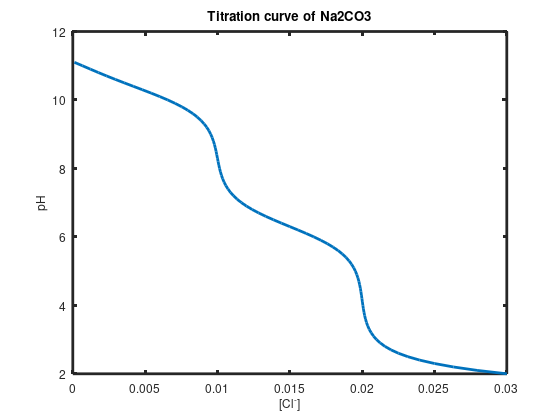

In [25]:
pKa1=6.3; pKa2=10.3; Kw=10^-14; 
Ka1=10^-pKa1; Ka2=10^-pKa2;
pH=2:0.1:12; H=10.^-pH; OH=Kw./H;
CT=0.01; 

denominator=H.^2+Ka1*H+Ka1*Ka2;
alphaHA=(Ka1*H)./denominator; HCO3=CT*alphaHA;
alphaA=(Ka1*Ka2)./denominator; CO3=CT*alphaA;

Na=2*CT; % two sodium per mole of Na2CO3
Cl=H+Na-HCO3-OH-2*CO3;

% only plot the positive values
c=0;
for i=1:size(Cl,2)
if Cl(i)>=0; c=c+1; Clpos(c)=Cl(i); pHpos(c)=pH(i); end
end

plot(Clpos,pHpos,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12)
xlabel('[Cl^-]','fontsize',12);
ylabel('pH','fontsize',12)
title('Titration curve of Na2CO3')

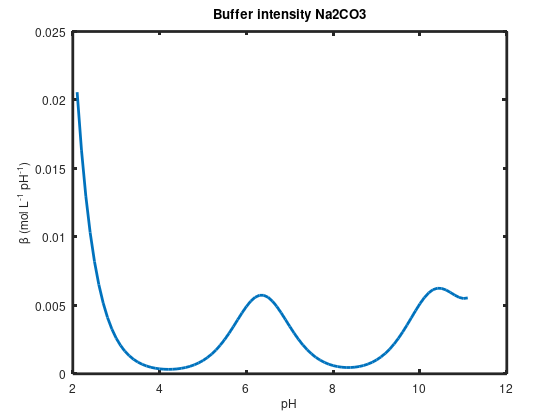

In [26]:
dCl=diff(Clpos); 
dpH=diff(pHpos); 
B=-dCl./dpH; % since pH is decreasing we multiply by -1
pHplot=pHpos(1:size(pHpos,2)-1)+dpH(1);
plot(pHplot,B,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('pH','fontsize',12); 
ylabel('\beta (mol L^{-1} pH^{-1})','fontsize',12)
title('Buffer intensity Na2CO3')